<a href="https://colab.research.google.com/github/Dabaiee/CS5100group7/blob/main/group7_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# pip install keras 
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Load the data

# Validate the data frame
# To validate the data frame is empty or not

In [2]:
def read_url(url):
    df = pd.read_csv(url)
    if(df.empty):
        print ('url file is empty')
    else:
        print ('url file is not empty')
        return df

In [3]:
#1st approach get data from our github
url = 'https://raw.githubusercontent.com/Dabaiee/CS5100group7/main/datasets/ETH-USD.csv'
df = pd.read_csv(url)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
1828,2022-11-11,1298.882446,1302.295288,1211.329590,1287.221069,1287.221069,20920539099
1829,2022-11-12,1287.438354,1288.150879,1242.152222,1255.268311,1255.268311,10964962767
1830,2022-11-13,1255.441284,1271.712524,1208.520996,1221.819214,1221.819214,10717455214
1831,2022-11-14,1221.895508,1284.217651,1178.429077,1241.604248,1241.604248,15028035663


In [4]:
read_url(url)

url file is not empty


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
1828,2022-11-11,1298.882446,1302.295288,1211.329590,1287.221069,1287.221069,20920539099
1829,2022-11-12,1287.438354,1288.150879,1242.152222,1255.268311,1255.268311,10964962767
1830,2022-11-13,1255.441284,1271.712524,1208.520996,1221.819214,1221.819214,10717455214
1831,2022-11-14,1221.895508,1284.217651,1178.429077,1241.604248,1241.604248,15028035663


#data types

In [5]:
print(df.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


#validate data to check missing values

In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
for col in df.columns:
    miss = df[col].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(col,miss))
    else:
        print("{} has NO missing value!".format(col))

Date has NO missing value!
Open has NO missing value!
High has NO missing value!
Low has NO missing value!
Close has NO missing value!
Adj Close has NO missing value!
Volume has NO missing value!


In [8]:
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_datetime(df[col])
        except ValueError:
            pass
print(df.dtypes)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


In [9]:
df['Close'].describe()

count    1833.000000
mean     1127.568915
std      1202.639823
min        84.308296
25%       209.703995
50%       474.626434
75%      1799.166260
max      4812.087402
Name: Close, dtype: float64

In [10]:
# !pip install --upgrade pandas-datareader

# !pip install --upgrade pandas

In [11]:
#2nd apprroach to get data
#get data from yahoo
# current = dt.datetime.now()
# df = web.DataReader('ETH-USD', data_source='yahoo', start='2016-01-01', end=current)
# df

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1833 non-null   datetime64[ns]
 1   Open       1833 non-null   float64       
 2   High       1833 non-null   float64       
 3   Low        1833 non-null   float64       
 4   Close      1833 non-null   float64       
 5   Adj Close  1833 non-null   float64       
 6   Volume     1833 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 100.4 KB


In [13]:
df.shape

(1833, 7)

# Visualization

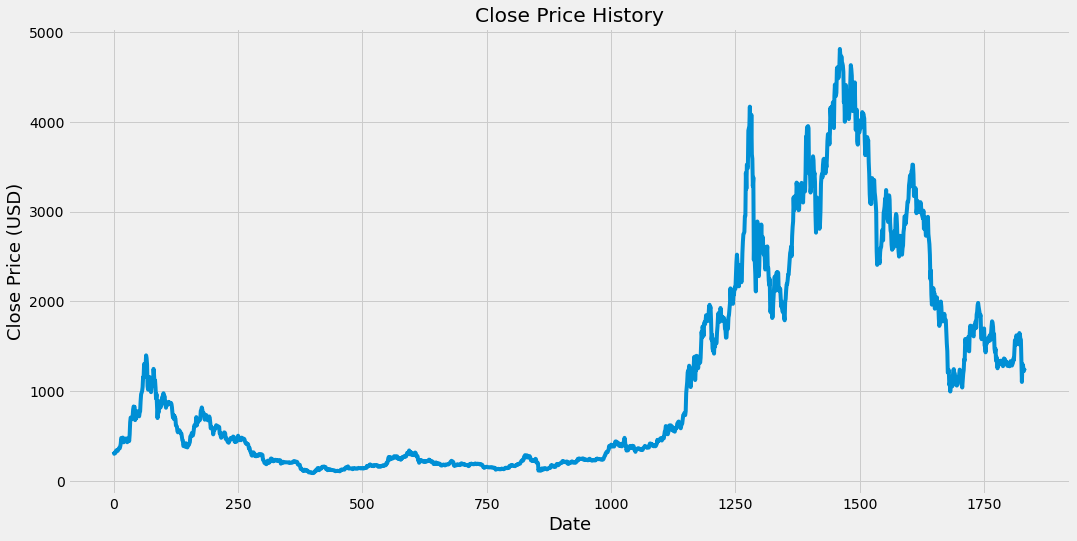

In [14]:
#visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price (USD)', fontsize = 18)
plt.show()

In [15]:
move_average_100 = df.Close.rolling(100).mean()
move_average_100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1828    1507.766302
1829    1504.236928
1830    1499.132573
1831    1494.632035
1832    1490.171121
Name: Close, Length: 1833, dtype: float64

In [16]:
move_average_200 = df.Close.rolling(200).mean()
move_average_200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1828    1606.376496
1829    1598.611346
1830    1590.275794
1831    1581.799110
1832    1573.987398
Name: Close, Length: 1833, dtype: float64

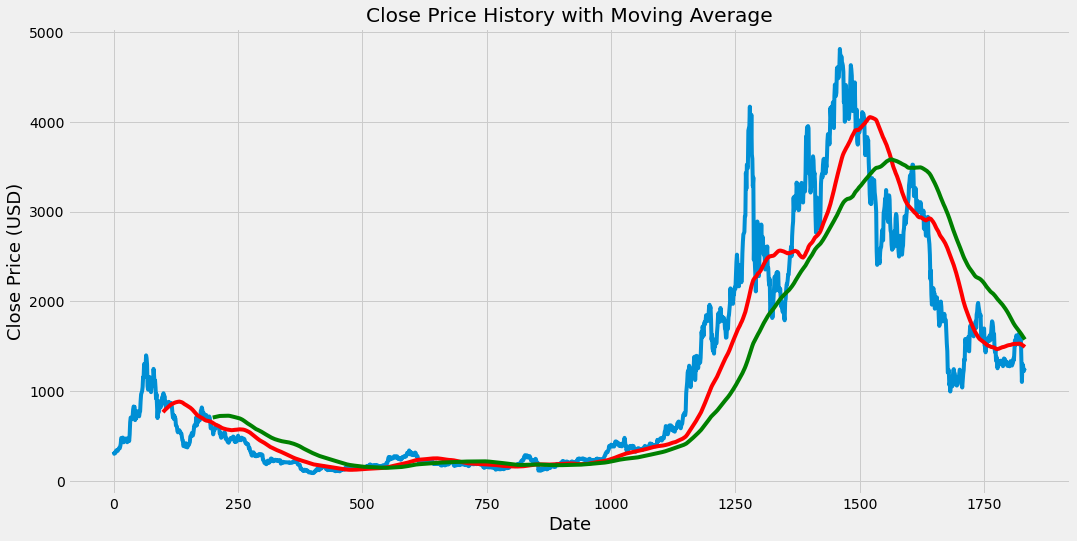

In [17]:
plt.figure(figsize=(16,8))
plt.title('Close Price History with Moving Average')
plt.plot(df['Close'])
plt.plot(move_average_100, 'r')
plt.plot(move_average_200, 'g')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price (USD)', fontsize = 18)
plt.show()


In [18]:
 #create a new dataframe with 'Close' column
data = df.filter(['Close'])
#convert the dataframe into an array
dataset = data.values
#count number of data to train the model
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len


1467

In [19]:
#Scale the data - it is advantage to pre processing the scaling to input data before neural network
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0500395 ],
       [0.0454642 ],
       [0.04872747],
       ...,
       [0.24060154],
       [0.24478638],
       [0.24725163]])

In [20]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
train_data
#split the data into x_train and y_train data sets
#x_train is train feature
x_train = []
#y_train is target var
y_train = []

#we use past continuously 60 days of x to predict the 61st day of y, 
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  # if i <= 61:
  #   print('x',x_train)
  #   print('y',y_train)
  #   print('.............')

In [21]:
#convert the x_train and y_train to an array
x_train = np.array(x_train)
y_train = np.array(y_train)

In [22]:
#we start at index 59 -> 60th of x
x_train.shape
# print(x_train[0])

(1407, 60)

In [23]:
#LSTM need input to be 3-D (num of samples, num of time steps, num of features) 
#therefore, need to reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(1407, 60, 1)

In [24]:
from keras.engine import input_layer
#build the LSTM model (continuously dataset)
#LSTM is one of the recurrent neural network
model = Sequential()
#use 50 neurons
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [25]:
#compile the model
#optimizer is used to improve the loss function (adaptive moment)
#loss function measure the accurate of model on training
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
#train the model
#batch size is the total number of training examples present in a single batch
#epochs is the iterations when an entire dataset is passed forward and backward thru a neural netwok
model.fit(x_train, y_train, batch_size=1, epochs=1)

1407/1407 [==============================] - 18s 11ms/step - loss: 0.0024


In [27]:
#create the testing data set
#create an new array ontained rest of scaled value (0,1)
test_data = scaled_data[training_data_len - 60:, :]
#create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

#idea here is we use rest of scaled data （scaled_data * 20%)
#start from index 60 of test_data, in group of 60, and we put 60 numbers into x_test

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
print(len(x_test))
y_test.shape

366


(366, 1)

In [28]:
#convert the data to a numpy array
x_test = np.array(x_test)
x_test

array([[0.73755278, 0.70101213, 0.70809358, ..., 0.9693361 , 0.96602486,
        0.96071548],
       [0.70101213, 0.70809358, 0.68639833, ..., 0.96602486, 0.96071548,
        0.94615157],
       [0.70809358, 0.68639833, 0.60804133, ..., 0.96071548, 0.94615157,
        0.87399535],
       ...,
       [0.32794398, 0.29345389, 0.2851528 , ..., 0.25702476, 0.25443506,
        0.24767655],
       [0.29345389, 0.2851528 , 0.29304106, ..., 0.25443506, 0.24767655,
        0.24060154],
       [0.2851528 , 0.29304106, 0.26461067, ..., 0.24767655, 0.24060154,
        0.24478638]])

In [29]:
#reshape the data x_test to 3-D for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [30]:
#get the model predicted price values
#use the model with x_test values to get the predicted y
predictions = model.predict(x_test)
#unscalling the values, use inverse the scaled value to noraml value
#we want predictions contain the same values as y_test data set
predictions = scaler.inverse_transform(predictions)

12/12 [==============================] - 1s 7ms/step


# ML Model(s) Testing validation metrics


## MSE and RMSE

In [32]:
#RMSE is measure of how accurate the model predicts
#RMSE is the standard deviation of the residuals

#predictions: get from model with x_test
#y_test: the actural value from data set
mse = np.mean(predictions - y_test)** 2
print("MSE : " + str(mse))
rmse = np.sqrt(mse)
print("RMSE : ", rmse)

MSE: 15464.585418330013
RMSE: 124.35668626306352


# Mean Absolute Error (MAE)

In [42]:
# Mean Absolute Error calculates the average difference between the calculated values and actual values. 
# It is also known as scale-dependent accuracy as it calculates error in observations taken on the same scale. It is used as evaluation metrics for regression models in machine learning. It calculates errors between actual values and values predicted by the model.
# It is used to predict the accuracy of the machine learning model.
# calculate MAE
mean_absolute_error = mae(y_test, predictions)
  
# display
print("Mean absolute error : " , mean_absolute_error)

Mean absolute error :  160.0106349292179


# R square

In [38]:
#It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s).
# Perfect model : 1
# It shows that our model predicts the change in stock prices pretty well
_square = r2_score(y_test, predictions)
print('r2 score is', r_square)

r2 score is 0.9550210666114055


## RSE

In [40]:
# In order to calculate Relative Squared Error, you take the Mean Squared Error (MSE) and divide it by the square of the difference between the actual and the mean of the data.
# In other words, we divide the MSE of our model by the MSE of a model which uses the mean as the predicted value.
# If the RSE is small, the model fits the data very well, 
# and if the RSE is large, the model fits the data poorly.

true_mean = np.mean(y_test)
squared_error_num = np.sum(np.square(y_test - predictions))
squared_error_den = np.sum(np.square(y_test - true_mean))
rse_loss = squared_error_num / squared_error_den
print('rse score is', rse_loss)

rse score is 0.04497893338859444


## Normalized Root Mean Squared Error (NRMSE)

In [41]:
# The Normalized RMSE is generally computed by dividing a scalar value. 
squared_error = np.square((y_test - predictions))
sum_squared_error = np.sum(squared_error)
rmse = np.sqrt(sum_squared_error / y_test.size)
nrmse_loss = rmse/np.std(predictions)
print('nrmse loss score is', nrmse_loss)


nrmse loss score is 0.209377136135689


## Mean Absolute Percentage Error (MAPE)

In [65]:
# Mean absolute percentage error is calculated by taking the difference between the actual value and the predicted value and dividing it by the actual value. 
# An absolute percentage is applied to this value and it is averaged across the dataset. MAPE is also known as Mean Absolute Percentage Deviation (MAPD). 
# It increases linearly with an increase in error. The smaller the MAPE, the better the model performance.
abs_error = (np.abs(y_test - predictions)) / y_test
sum_abs_error = np.sum(abs_error)
mape_loss = (sum_abs_error / y_test.size) * 100
mape_loss

8.680361640586513

## Relative Absolute Error (RAE)

In [66]:
# Relative absolute error is computed by taking the total absolute error and dividing it by the absolute difference between the mean and the actual value.
true_mean = np.mean(y_test)
squared_error_num = np.sum(np.abs(y_test - predictions))
squared_error_den = np.sum(np.abs(y_test - true_mean))
rae_loss = squared_error_num / squared_error_den
print('rae loss score is', rae_loss)


0.2093514247450453

In [45]:
mse = np.mean(predictions - y_test)** 2
print("MSE : " + str(mse))
rmse = np.sqrt(mse)
print("RMSE : ", rmse)
mean_absolute_error = mae(y_test, predictions)
print("Mean absolute error : " , mean_absolute_error)
_square = r2_score(y_test, predictions)
print('r2 score is', r_square)

MSE : 15464.585418330013
RMSE :  124.35668626306352
Mean absolute error :  160.0106349292179
r2 score is 0.9550210666114055


C:\Users\eason\AppData\Local\Temp/ipykernel_27148/2833820274.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


            Close  Predictions
1467  4557.503906  4724.831543
1468  4216.365234  4703.016602
1469  4287.593750  4630.270508
1470  4000.650879  4555.541992
1471  4298.306641  4448.657227
...           ...          ...
1828  1287.221069  1506.202026
1829  1255.268311  1456.603760
1830  1221.819214  1415.454834
1831  1241.604248  1379.626465
1832  1253.259399  1353.499878

[366 rows x 2 columns]


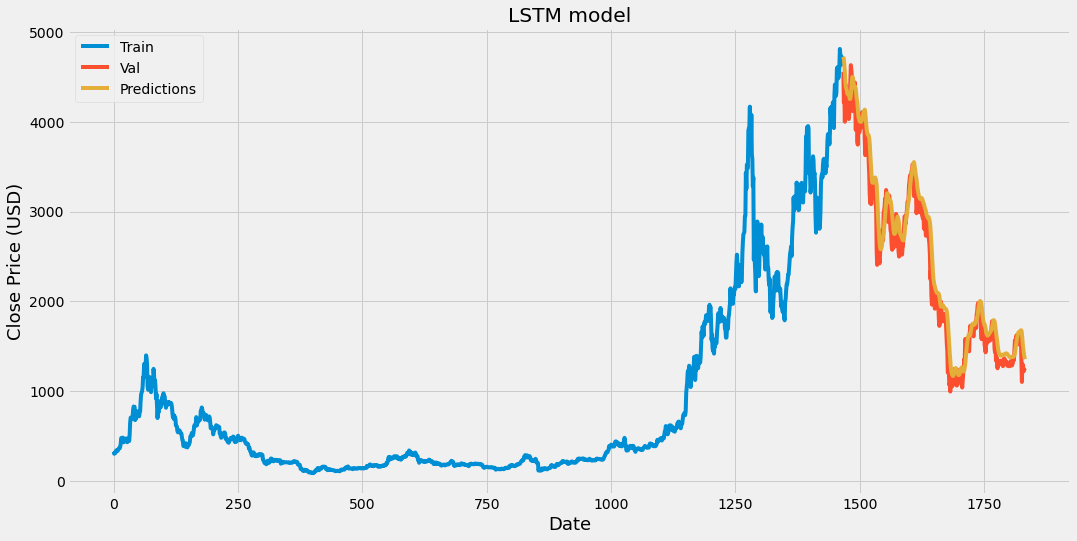

In [43]:
#plot the data
#80% data as train data
train = data[:training_data_len]
#20% data as valid data
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTM model')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price (USD)', fontsize = 18)
plt.plot(train['Close'])


# plt.plot(valid[['Close', 'Predictions']])
plt.plot(valid['Close'])
print(valid)
plt.plot(valid['Predictions'])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()


In [44]:
valid['Date'] = df['Date'][training_data_len:]

C:\Users\eason\AppData\Local\Temp/ipykernel_27148/2352767078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Date'] = df['Date'][training_data_len:]


In [45]:
#show the valid and predicted prices
valid

,Close,Predictions,Date
1467,4557.503906,4796.141602,2021-11-15
1468,4216.365234,4778.983887,2021-11-16
1469,4287.593750,4719.483887,2021-11-17
1470,4000.650879,4652.402832,2021-11-18
1471,4298.306641,4555.623535,2021-11-19
...,...,...,...
1828,1287.221069,1539.915894,2022-11-11
1829,1255.268311,1489.430420,2022-11-12
1830,1221.819214,1444.242432,2022-11-13
1831,1241.604248,1403.210083,2022-11-14


#save cvs file in google drive

In [47]:
from google.colab import drive
# drive.mount('drive')
drive.mount("drive", force_remount=True)
valid.to_csv('data.csv')
!cp data.csv "drive/My Drive/Colab Notebooks/"

ModuleNotFoundError: No module named 'google.colab'

**using the last 60 data to predict the stock price**

In [ ]:
quote = df
#create the new data frame
new_df = quote.filter(['Close'])
#get last 60 days values and convert them into array to predict the 61st value
last_60 = new_df[-60:].values
#scale the data using scaler (value between 0 and 1)
#use transform for test values instead train values
last_60_scaled = scaler.transform(last_60)
#create x_test_60
x_test_60 = []

x_test_60.append(last_60_scaled)
#convert the x_test_60 to array
x_test_60 = np.array(x_test_60)
#reshape the data to 3-D
x_test_60 = np.reshape(x_test_60, (x_test_60.shape[0], x_test_60.shape[1],1))
#get predicted scaled price by modle and x_test_60
predict_price = model.predict(x_test_60)
#inverse the scaled price to normal price
predict_price = scaler.inverse_transform(predict_price)
result = float(predict_price[0])
print(predict_price) 
print(result)


1/1 [==============================] - 0s 40ms/step
[[1193.4417]]
1193.441650390625


In [ ]:
import pandas as pd
from google.colab import drive
# drive.mount('pre')
drive.mount("drive", force_remount=True)
list_pred = [result]
predicted = pd.DataFrame(list_pred, columns = ['predict'])
predicted

Mounted at drive


,predict
0,1193.44165


#save final predicted close price in cvs and upload to google drive

In [ ]:
from google.colab import drive
# drive.mount('drive')
drive.mount("drive", force_remount=True)
predicted.to_csv('drive/MyDrive/Colab Notebooks/sample.csv', index=False)

Mounted at drive
